### EDA 했는데 데이터 이해도 딱히 없고, 얻는 인사이트 딱히 없는 거 같음.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, shapiro

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 로드
df_merged = pd.read_csv('df_merged.csv')

### 분표 필요성 분석

### 1. TPC, TFC 분포 분석
- TPC = 방향성 화합물 주 지표, 약효 성분
- TFC = 항산화 활성, 스트레스 방어물질

In [3]:
# 타겟 변수 리스트
target_vars = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']

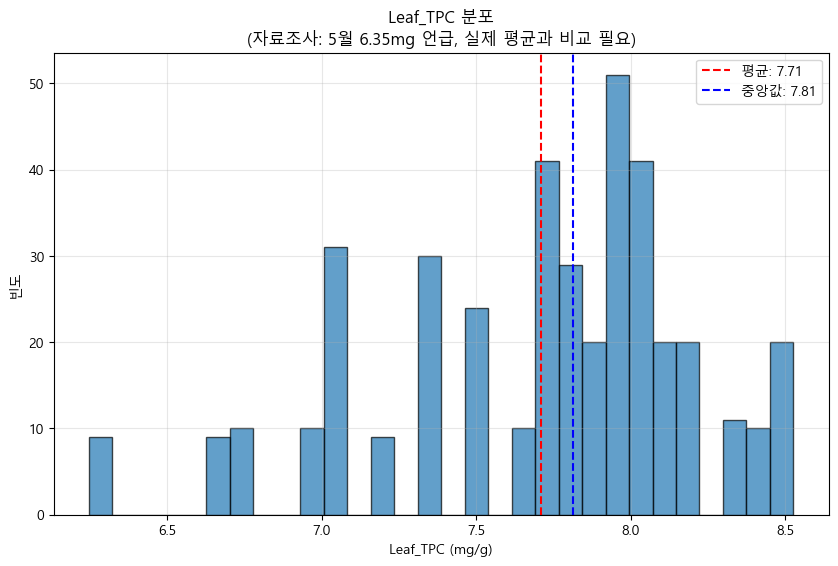

통계: {'평균': np.float64(7.708358024691359), '중앙값': np.float64(7.814), '왜도': np.float64(-0.8152680751918611), '첨도': np.float64(0.2717416777573356)}
해석: 왜도 -0.82 → 변환 필요할 수 있음


In [11]:
# 1-1. Leaf_TPC 분포
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Leaf_TPC'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=df_merged['Leaf_TPC'].mean(), color='red', linestyle='--', label=f'평균: {df_merged["Leaf_TPC"].mean():.2f}')
plt.axvline(x=df_merged['Leaf_TPC'].median(), color='blue', linestyle='--', label=f'중앙값: {df_merged["Leaf_TPC"].median():.2f}')
plt.xlabel('Leaf_TPC (mg/g)')
plt.ylabel('빈도')
plt.title('Leaf_TPC 분포\n(자료조사: 5월 6.35mg 언급, 실제 평균과 비교 필요)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

leaf_tpc_stats = {
    '평균': df_merged['Leaf_TPC'].mean(),
    '중앙값': df_merged['Leaf_TPC'].median(),
    '왜도': skew(df_merged['Leaf_TPC']),
    '첨도': kurtosis(df_merged['Leaf_TPC'])
}
print(f"통계: {leaf_tpc_stats}")
print(f"해석: 왜도 {leaf_tpc_stats['왜도']:.2f} → {'정규분포에 가까움' if abs(leaf_tpc_stats['왜도']) < 0.5 else '변환 필요할 수 있음'}")

- 자료조사 예상치? -> 그래프 애매..???
- 그래프 5월 6.35mg 언급됐으면 오히려 월별로 확인했어야 할 거 같음.

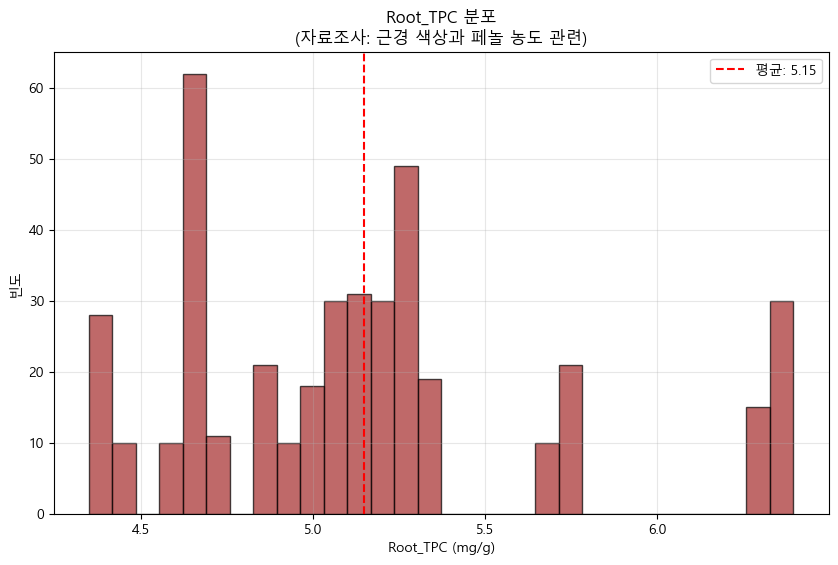

In [12]:
# 1-2. Root_TPC 분포
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Root_TPC'], bins=30, edgecolor='black', alpha=0.7, color='brown')
plt.axvline(x=df_merged['Root_TPC'].mean(), color='red', linestyle='--', label=f'평균: {df_merged["Root_TPC"].mean():.2f}')
plt.xlabel('Root_TPC (mg/g)')
plt.ylabel('빈도')
plt.title('Root_TPC 분포\n(자료조사: 근경 색상과 페놀 농도 관련)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

- 시나리오별 확인, 월별, 온도별 비교 분석해보면 좀 더 잘 나올듯.
- 5.15 아래 = 일반적 환경 상태, 5.15 이상 = 스트레스 증가 따른 방어 반응 활성화 상태

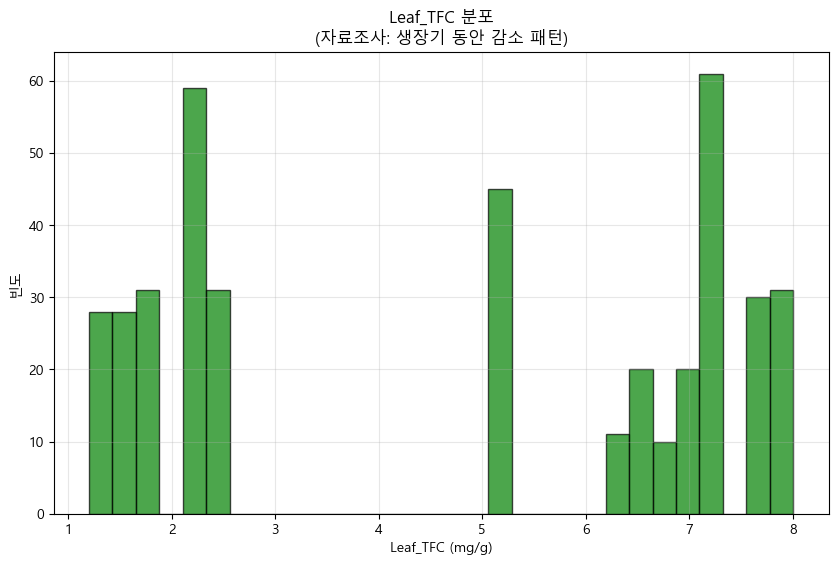

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Leaf_TFC'], bins=30, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Leaf_TFC (mg/g)')
plt.ylabel('빈도')
plt.title('Leaf_TFC 분포\n(자료조사: 생장기 동안 감소 패턴)')
plt.grid(True, alpha=0.3)
plt.show()

- 좀 더 다양한 EDA 방법을 사용하는 게 좋을듯.
- 지금 이거로 딱히 보이는 인사이트는 없어보이고, 데이터에 대한 이해도 높일 수 없는 EDA

In [16]:
# 월별 TFC 변화 확인
monthly_tfc = df_merged.groupby('month')['Leaf_TFC'].mean()
print(f"\n월별 Leaf_TFC 평균:")
print(monthly_tfc)
if 5 in monthly_tfc.index and 9 in monthly_tfc.index:
    change = (monthly_tfc[9] - monthly_tfc[5]) / monthly_tfc[5] * 100
    print(f"5월→9월 변화: {change:.1f}% (자료조사: 47% 감소)")
    if abs(change + 47) > 10:
        print("자료조사와 차이 있음 - 추가 확인 필요")


월별 Leaf_TFC 평균:
month
5    5.238667
6    7.305000
7    7.171366
8    2.082387
9    1.638536
Name: Leaf_TFC, dtype: float64
5월→9월 변화: -68.7% (자료조사: 47% 감소)
자료조사와 차이 있음 - 추가 확인 필요


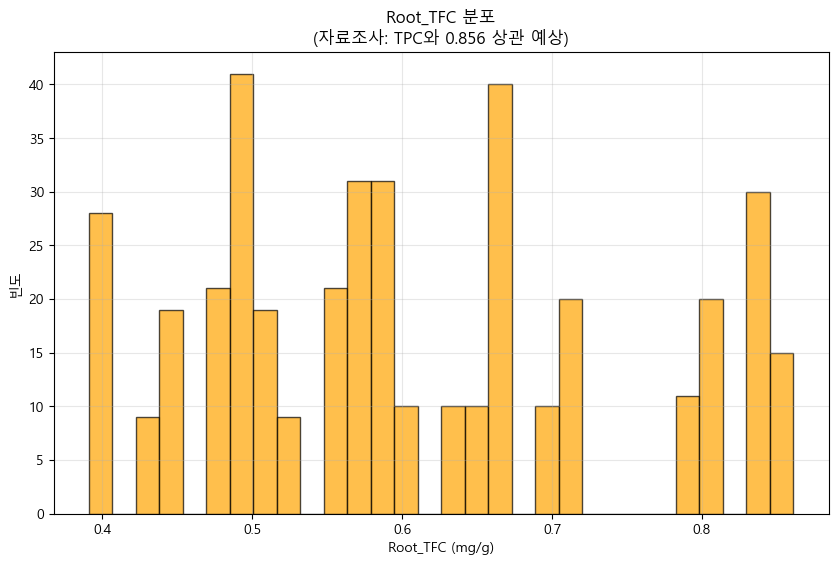

Root_TFC 통계: {'평균': np.float64(0.6053604938271604), '왜도': np.float64(0.37247311724388665), '범위': (np.float64(0.391), np.float64(0.861))}
분포 특성: 좁은 범위 (0.39-0.86)


In [17]:
# 1-4. Root_TFC 분포
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Root_TFC'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Root_TFC (mg/g)')
plt.ylabel('빈도')
plt.title('Root_TFC 분포\n(자료조사: TPC와 0.856 상관 예상)')
plt.grid(True, alpha=0.3)
plt.show()

root_tfc_stats = {
    '평균': df_merged['Root_TFC'].mean(),
    '왜도': skew(df_merged['Root_TFC']),
    '범위': (df_merged['Root_TFC'].min(), df_merged['Root_TFC'].max())
}
print(f"Root_TFC 통계: {root_tfc_stats}")
print(f"분포 특성: 좁은 범위 ({root_tfc_stats['범위'][0]:.2f}-{root_tfc_stats['범위'][1]:.2f})")

### 광합성 지표 분포 (정규성 검정)
- PI_abs: 광합성 활력 종합지표, 9월 80% 감소 언급
- Fv/Fm: 최대 광화학 효율 (정상 범위 자료조사에 없음)
- TChl: 식물 건강도 지표, SSP5에서 대폭 감소 언급

In [18]:
photosynthesis_vars = ['PI_abs', 'Fv-Fm', 'TChl']

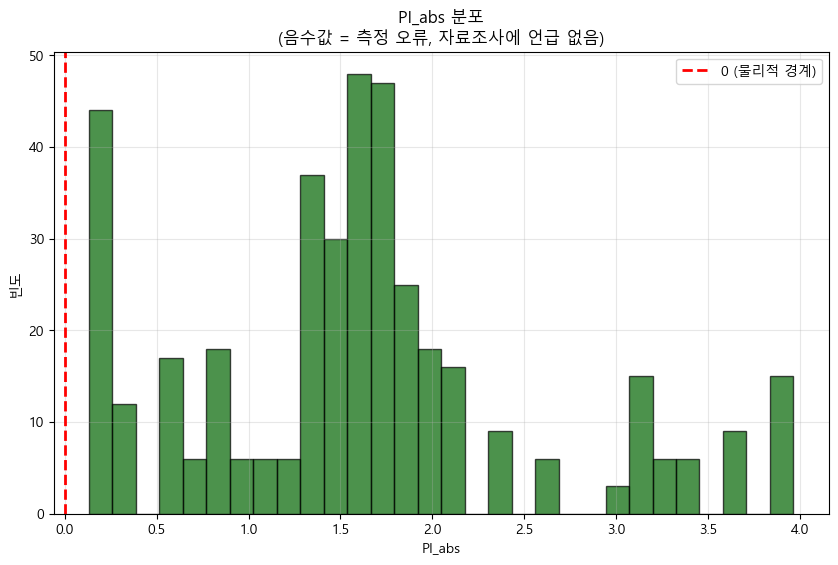

Shapiro-Wilk 검정: 통계량=0.9292, p-value=0.0000
결과: 정규분포 아님 → 변환 고려


In [22]:
# 2-1. PI_abs 정규성
plt.figure(figsize=(10, 6))
plt.hist(df_merged['PI_abs'], bins=30, edgecolor='black', alpha=0.7, color='darkgreen')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='0 (물리적 경계)')
plt.xlabel('PI_abs')
plt.ylabel('빈도')
plt.title('PI_abs 분포\n(음수값 = 측정 오류, 자료조사에 언급 없음)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Shapiro-Wilk 검정
stat, p_value = shapiro(df_merged['PI_abs'].dropna())
print(f"Shapiro-Wilk 검정: 통계량={stat:.4f}, p-value={p_value:.4f}")
print(f"결과: {'정규분포' if p_value > 0.05 else '정규분포 아님'} → {'변환 불필요' if p_value > 0.05 else '변환 고려'}")

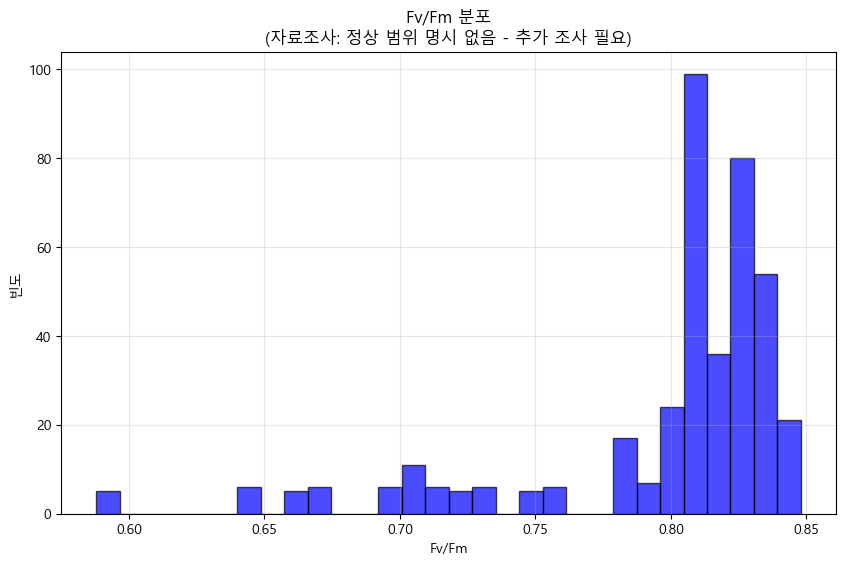

왜도: -2.073


In [25]:
# 2-2. Fv/Fm 정규성
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Fv-Fm'], bins=30, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('Fv/Fm')
plt.ylabel('빈도')
plt.title('Fv/Fm 분포\n(자료조사: 정상 범위 명시 없음 - 추가 조사 필요)')
plt.grid(True, alpha=0.3)
plt.show()

fv_fm_skewness = skew(df_merged['Fv-Fm'])
print(f"왜도: {fv_fm_skewness:.3f}")

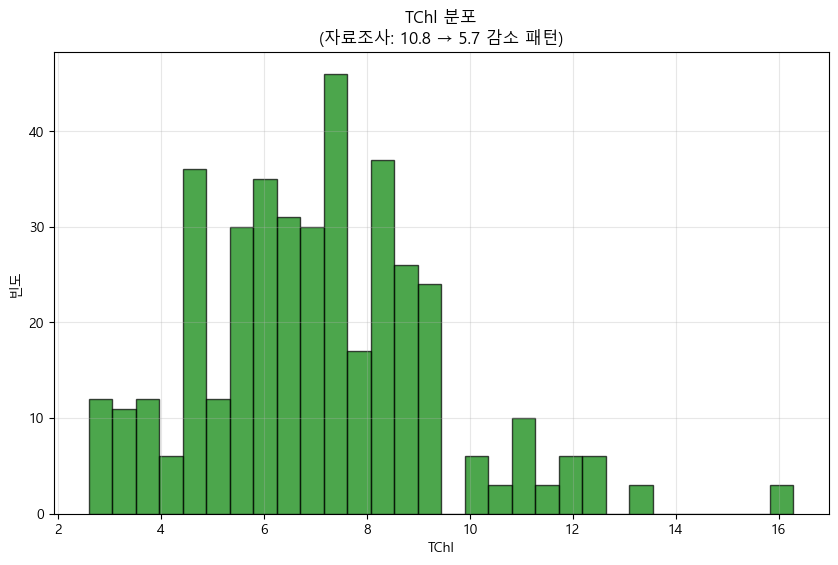

In [26]:
# 2-3. TChl 정규성
plt.figure(figsize=(10, 6))
plt.hist(df_merged['TChl'], bins=30, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('TChl')
plt.ylabel('빈도')
plt.title('TChl 분포\n(자료조사: 10.8 → 5.7 감소 패턴)')
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
# 시나리오별 TChl 확인
tchl_by_scenario = df_merged.groupby('scenario')['TChl'].mean()
print(f"\n시나리오별 TChl 평균:")
print(tchl_by_scenario)
print(f"SSP5 감소율: {(tchl_by_scenario['SSP5']/tchl_by_scenario['SSP1']-1)*100:.1f}%")


시나리오별 TChl 평균:
scenario
SSP1    8.831778
SSP3    6.772222
SSP5    5.627852
Name: TChl, dtype: float64
SSP5 감소율: -36.3%


### 환경 변수 분포와 변환 필요성
- VPD: 2.5 kPa 이상에서 스트레스, 미세털 보호 메커니즘
- CO2ppm: SSP 시나리오 핵심, 비선형 효과
- Temp: 15-25°C 적정, 스트레스 원인

In [28]:
env_vars = ['VPD', 'CO2ppm', 'Temp']

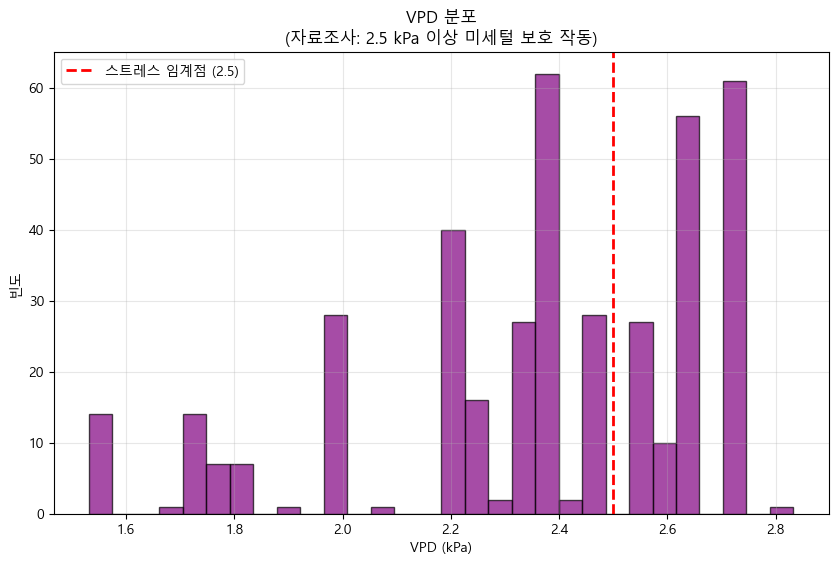

2.5 kPa 초과 비율: 38.3%
왜도: -0.918


In [30]:
# 3-1. VPD 분포
plt.figure(figsize=(10, 6))
plt.hist(df_merged['VPD'], bins=30, edgecolor='black', alpha=0.7, color='purple')
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=2, label='스트레스 임계점 (2.5)')
plt.xlabel('VPD (kPa)')
plt.ylabel('빈도')
plt.title('VPD 분포\n(자료조사: 2.5 kPa 이상 미세털 보호 작동)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

vpd_above_threshold = (df_merged['VPD'] > 2.5).mean() * 100
print(f"2.5 kPa 초과 비율: {vpd_above_threshold:.1f}%")
print(f"왜도: {skew(df_merged['VPD']):.3f}")

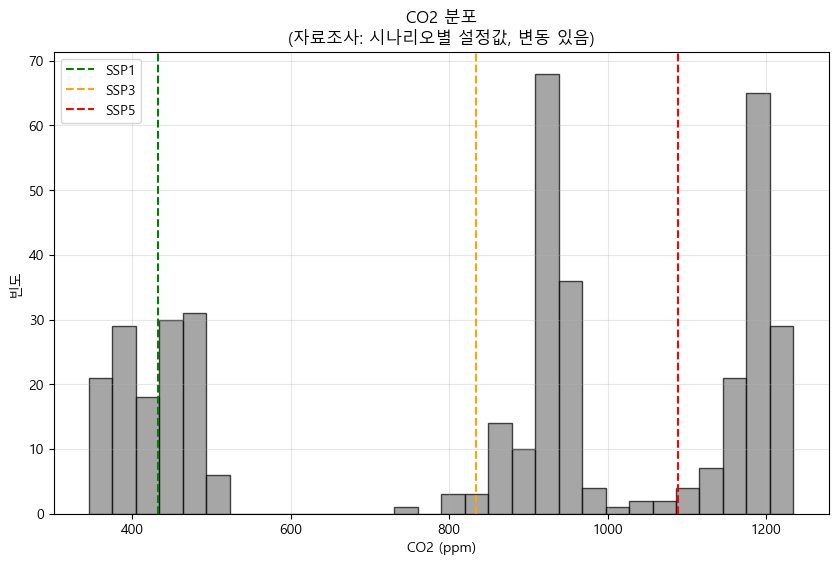


시나리오별 CO2 표준편차:
scenario
SSP1    45.739454
SSP3    36.588320
SSP5    50.843758
Name: CO2ppm, dtype: float64


In [32]:
# 3-2. CO2 분포
plt.figure(figsize=(10, 6))
plt.hist(df_merged['CO2ppm'], bins=30, edgecolor='black', alpha=0.7, color='gray')
plt.axvline(x=432, color='green', linestyle='--', label='SSP1')
plt.axvline(x=834, color='orange', linestyle='--', label='SSP3')
plt.axvline(x=1089, color='red', linestyle='--', label='SSP5')
plt.xlabel('CO2 (ppm)')
plt.ylabel('빈도')
plt.title('CO2 분포\n(자료조사: 시나리오별 설정값, 변동 있음)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

co2_variance = df_merged.groupby('scenario')['CO2ppm'].std()
print(f"\n시나리오별 CO2 표준편차:")
print(co2_variance)

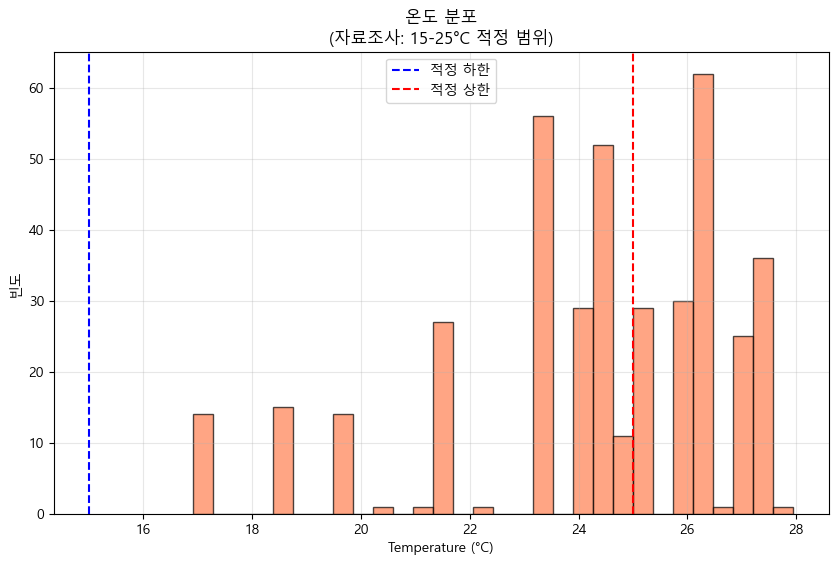

적정 범위 내 비율: 54.6%
적정 범위 벗어난 데이터: 45.4%


In [33]:
# 3-3. Temperature 분포
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Temp'], bins=30, edgecolor='black', alpha=0.7, color='coral')
plt.axvline(x=15, color='blue', linestyle='--', label='적정 하한')
plt.axvline(x=25, color='red', linestyle='--', label='적정 상한')
plt.xlabel('Temperature (°C)')
plt.ylabel('빈도')
plt.title('온도 분포\n(자료조사: 15-25°C 적정 범위)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

temp_optimal = ((df_merged['Temp'] >= 15) & (df_merged['Temp'] <= 25)).mean() * 100
print(f"적정 범위 내 비율: {temp_optimal:.1f}%")
print(f"적정 범위 벗어난 데이터: {100-temp_optimal:.1f}%")

### 변환이 필요한 변수 식별

In [35]:
# 모든 수치형 변수 왜도 확인
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['month', 'scenario']]

skewness_dict = {}
for col in numeric_cols:
    skewness_dict[col] = skew(df_merged[col].dropna())

In [36]:
# 왜도 기준 분류
high_skew = {k: v for k, v in skewness_dict.items() if abs(v) > 1}
moderate_skew = {k: v for k, v in skewness_dict.items() if 0.5 <= abs(v) <= 1}
low_skew = {k: v for k, v in skewness_dict.items() if abs(v) < 0.5}

print("\n### 왜도 기반 변환 필요성")
print(f"\n높은 왜도 (|skew| > 1) - 변환 필요:")
for var, skew_val in high_skew.items():
    print(f"  {var}: {skew_val:.3f}")
    
print(f"\n중간 왜도 (0.5 ≤ |skew| ≤ 1) - 변환 고려:")
for var, skew_val in moderate_skew.items():
    print(f"  {var}: {skew_val:.3f}")

print(f"\n낮은 왜도 (|skew| < 0.5) - 변환 불필요:")
print(f"  {len(low_skew)}개 변수")


### 왜도 기반 변환 필요성

높은 왜도 (|skew| > 1) - 변환 필요:
  Temp: -1.166
  Humid: 1.408
  Chl_a_b: 7.410
  Dio-RC: 1.632
  DF_abs: -1.234
  Fv-Fm: -2.073
  Root_ExtractionYield: 1.448

중간 왜도 (0.5 ≤ |skew| ≤ 1) - 변환 고려:
  VPD: -0.918
  Chl_a: 0.867
  Chl_b: 0.765
  TChl: 0.697
  Car: 0.723
  TCh-Car: -0.803
  ABS-RC: 0.722
  Tro-RC: 0.638
  Eto-RC: 0.749
  PI_abs: 0.597
  Leaf_TPC: -0.815
  Root_TPC: 0.891

낮은 왜도 (|skew| < 0.5) - 변환 불필요:
  5개 변수


### 변환 전후 비교 (예시)


### Temp 변환 효과 (왜도: -1.166)


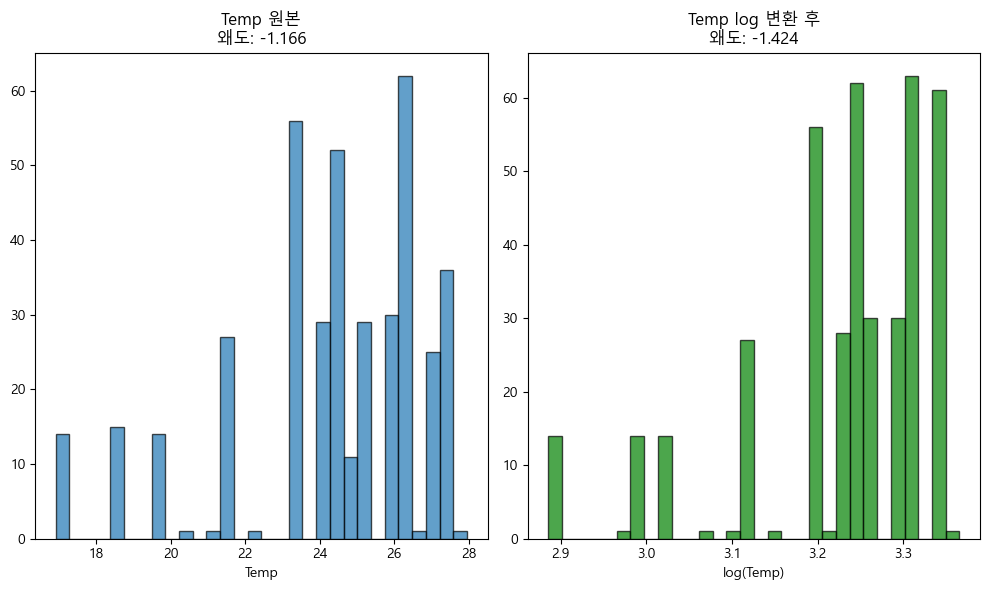

In [37]:
# 왜도가 높은 변수 하나 선택하여 변환 효과 보여주기
if high_skew:
    test_var = list(high_skew.keys())[0]
    print(f"\n### {test_var} 변환 효과 (왜도: {high_skew[test_var]:.3f})")
    
    # 원본
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df_merged[test_var].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'{test_var} 원본\n왜도: {skew(df_merged[test_var].dropna()):.3f}')
    plt.xlabel(test_var)
    
    # log 변환 (양수인 경우만)
    if df_merged[test_var].min() > 0:
        plt.subplot(1, 2, 2)
        log_transformed = np.log1p(df_merged[test_var])
        plt.hist(log_transformed.dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
        plt.title(f'{test_var} log 변환 후\n왜도: {skew(log_transformed.dropna()):.3f}')
        plt.xlabel(f'log({test_var})')
    else:
        plt.subplot(1, 2, 2)
        sqrt_transformed = np.sqrt(df_merged[test_var] - df_merged[test_var].min() + 1)
        plt.hist(sqrt_transformed.dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
        plt.title(f'{test_var} sqrt 변환 후\n왜도: {skew(sqrt_transformed.dropna()):.3f}')
        plt.xlabel(f'sqrt({test_var})')
    
    plt.tight_layout()
    plt.show()